In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tqdm import tqdm
from glob import glob

import cv2
import warnings
import torch
import json


In [ ]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps    

In [ ]:
import pathlib

path = pathlib.Path('/content/drive/MyDrive/모델')

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=11,
  batch_size=batch_size)

NameError: ignored

In [ ]:
class_names = train_ds.class_names
print(class_names)

['재활용가능데이터셋', '재활용불가능데이터셋']


In [ ]:
# 정규화 작업

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
# 정규화 작업

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0014939253 1.0


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [ ]:
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=11,
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=11,
  batch_size=batch_size)
# 정규화 작업

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
# 정규화 작업

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

Found 2902 files belonging to 2 classes.
Using 2322 files for training.
Found 2902 files belonging to 2 classes.
Using 580 files for validation.
0.0014939253 1.0


In [ ]:
# 모델 작성
# 
#num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)), ### 입력 값을 새로운 범위로 재조정하는 전처리 레이어.
  layers.Conv2D(16, 3, padding='same', activation='relu'),  ### 특정패턴의 특징이 어디서 나타나는지 확인
  #layers.BatchNormalization(),
#  layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer = l2(0.001)),
  layers.MaxPooling2D(),
 # layers.BatchNormalization(),
 # layers.Conv2D(32, 20, padding='same', activation='relu'),
 # layers.MaxPooling2D(),
 # layers.Conv2D(32, 16, padding='same', activation='relu'),
 # layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
 # layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer = l2(0.001)),
  layers.MaxPooling2D(),
 # layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
 # layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer = l2(0.001)),
 # layers.Conv2D(32, 5, padding='same', activation='relu', kernel_regularizer = l2(0.001)),
  layers.MaxPooling2D(),
 # layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
 # layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer = l2(0.001)),
  #layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer = l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  #layers.BatchNormalization(),
  layers.Flatten(),
  layers.Dense(2000, activation='relu'),
  layers.Dense(2000, activation='relu'),
#  layers.Dense(2000, activation='relu'),
#  layers.Dense(128, activation='relu'),
#  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),    
  layers.Dense(1, activation='sigmoid')
])

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)), ### 입력 값을 새로운 범위로 재조정하는 전처리 레이어.
  layers.Conv2D(16, 3, padding='same', activation='relu' ),  ### 특정패턴의 특징이 어디서 나타나는지 확인
#  layers.BatchNormalization(),
#  layers.Activation('relu'),
#  layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer = l2(0.001)),
  layers.MaxPooling2D(),
 # layers.BatchNormalization(),
 # layers.Conv2D(32, 20, padding='same', activation='relu'),
 # layers.MaxPooling2D(),
 # layers.Conv2D(32, 16, padding='same', activation='relu'),
 # layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same'),
 # layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer = l2(0.001)),
  layers.BatchNormalization(),
  layers.Activation('relu'),
  layers.MaxPooling2D(),
 # layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same'),
  layers.BatchNormalization(),
  layers.Activation('relu'),
 # layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer = l2(0.001)),
 # layers.Conv2D(32, 5, padding='same', activation='relu', kernel_regularizer = l2(0.001)),
  layers.MaxPooling2D(),
 # layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same'),
  layers.BatchNormalization(),
  layers.Activation('relu'),
 # layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer = l2(0.001)),
  #layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer = l2(0.001)),
  layers.MaxPooling2D(),
  #layers.BatchNormalization(),
  layers.Flatten(),
  layers.Dense(2000, activation='relu'),
  layers.Dense(2000, activation='relu'),
#  layers.Dense(2000, activation='relu'),
#  layers.Dense(128, activation='relu'),
#  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),    
  layers.Dense(1, activation='sigmoid')
])

AttributeError: ignored

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 64)       

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

In [ ]:
import shutil

shutil.rmtree('/content/training_3')

In [ ]:
# 체크포인트 고유 이름으로 저장하기

# 파일 이름에 에포크 번호를 포함시킵니다(`str.format` 포맷)
checkpoint_path = "training_3/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 다섯 번째 에포크마다 가중치를 저장하기 위한 콜백을 만듭니다
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=1) # 저장 주기 설정

# `checkpoint_path` 포맷을 사용하는 가중치를 저장합니다
model.save_weights(checkpoint_path.format(epoch=0))

# 새로운 콜백을 사용하여 모델을 훈련합니다
history = model.fit(train_ds,
          epochs=30, 
          callbacks=[cp_callback],
          validation_data=val_ds,
          verbose=1)

Epoch 1/30
72/73 [============================>.] - ETA: 0s - loss: 0.5232 - accuracy: 0.7487
Epoch 00001: saving model to training_3/cp-0001.ckpt
73/73 [==============================] - 28s 346ms/step - loss: 0.5211 - accuracy: 0.7498 - val_loss: 0.2945 - val_accuracy: 0.8534
Epoch 2/30
73/73 [==============================] - ETA: 0s - loss: 0.2316 - accuracy: 0.9160
Epoch 00002: saving model to training_3/cp-0002.ckpt
73/73 [==============================] - 27s 339ms/step - loss: 0.2316 - accuracy: 0.9160 - val_loss: 0.2163 - val_accuracy: 0.9293
Epoch 3/30
73/73 [==============================] - ETA: 0s - loss: 0.1622 - accuracy: 0.9436
Epoch 00003: saving model to training_3/cp-0003.ckpt
73/73 [==============================] - 26s 329ms/step - loss: 0.1622 - accuracy: 0.9436 - val_loss: 0.1504 - val_accuracy: 0.9431
Epoch 4/30
73/73 [==============================] - ETA: 0s - loss: 0.0986 - accuracy: 0.9591
Epoch 00004: saving model to training_3/cp-0004.ckpt
73/73 [=========

In [ ]:
epochs=30

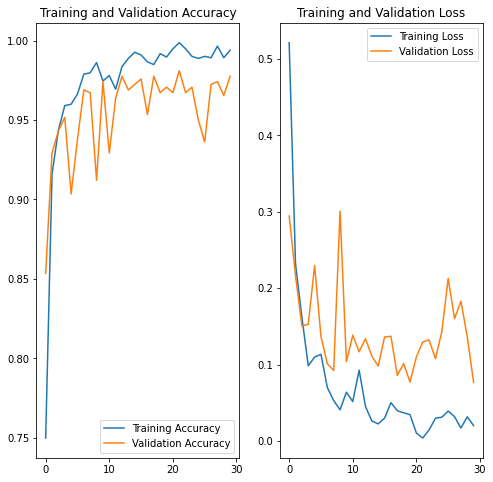

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.load_weights('/content/training_3/cp-0008.ckpt')


In [ ]:
model.save('/content/drive/MyDrive/모델 체크포인트/최종모델.h5')

In [ ]:
img_height = 256
img_width = 256

In [ ]:
PET_path = '/content/drive/MyDrive/테스트파일/불가능/KakaoTalk_20211117_002238726_01.jpg'

In [ ]:
ctsl=[]
for k in range(3,31):
  model.load_weights('/content/training_3/cp-00'+str(k).rjust(2,'0')+'.ckpt')
  ct = 0
  ct0 = 0
  ct1 = 0
  file_n = []
  file_n0 = []
  file_n1 = [] 
  for p in range(5):
    PET_path = '//content/drive/MyDrive/테스트파일/가능/손/KakaoTalk_20211117_002027577_'+str(p).rjust(2,'0')+'.jpg'
    img = keras.preprocessing.image.load_img(
        PET_path, target_size=(img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    a = ''
    if predictions[0] >= 0.2:
      a = ' X '
    else:
      a = ' O '
    if a == ' X ':
      ct += 1
      file_n.append(p)
  for j in range(6):
    PET_path = '/content/drive/MyDrive/테스트파일/가능/손x/KakaoTalk_20211117_002027577_'+str(j).rjust(2,'0')+'.jpg'
    img = keras.preprocessing.image.load_img(
        PET_path, target_size=(img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    a = ''
    if predictions[0] >= 0.2:
      a = ' X '
    else:
      a = ' O '
    if a == ' X ':
      ct0 += 1
      file_n0.append(j)
  for i in range(18):
    PET_path = '/content/drive/MyDrive/테스트파일/불가능/KakaoTalk_20211117_002238726_'+str(i).rjust(2,'0')+'.jpg'
    img = keras.preprocessing.image.load_img(
        PET_path, target_size=(img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    a = ''
    if predictions[0] >= 0.2:
      a = ' X '
    else:
      a = ' O '
    if a == ' O ':
      ct1 += 1
      file_n1.append(i)
  ctsl.append(ct+ct0+ct1)

  print(str(k)+'번째 체크포인트'+ '총 오류갯수 '+ str(ct+ct0+ct1))
  print('가능 에러 수(손)'+ str(ct) + '  파일 번호는',file_n)
  print('가능 에러 수'+ str(ct0) + '  파일 번호는',file_n0)

  print('불가능 에러 수'+ str(ct1) + '  파일 번호는',file_n1 )
print(str(ctsl.index(min(ctsl))+3)+' 번째 에서' + str(min(ctsl)) + ' 개로 가장적습니다' )

3번째 체크포인트총 오류갯수 10
가능 에러 수(손)0  파일 번호는 []
가능 에러 수0  파일 번호는 []
불가능 에러 수10  파일 번호는 [0, 1, 2, 5, 6, 7, 10, 11, 14, 15]
4번째 체크포인트총 오류갯수 10
가능 에러 수(손)4  파일 번호는 [1, 2, 3, 4]
가능 에러 수6  파일 번호는 [0, 1, 2, 3, 4, 5]
불가능 에러 수0  파일 번호는 []
5번째 체크포인트총 오류갯수 10
가능 에러 수(손)4  파일 번호는 [1, 2, 3, 4]
가능 에러 수6  파일 번호는 [0, 1, 2, 3, 4, 5]
불가능 에러 수0  파일 번호는 []
6번째 체크포인트총 오류갯수 8
가능 에러 수(손)4  파일 번호는 [1, 2, 3, 4]
가능 에러 수3  파일 번호는 [2, 4, 5]
불가능 에러 수1  파일 번호는 [1]
7번째 체크포인트총 오류갯수 2
가능 에러 수(손)1  파일 번호는 [4]
가능 에러 수0  파일 번호는 []
불가능 에러 수1  파일 번호는 [1]
8번째 체크포인트총 오류갯수 2
가능 에러 수(손)0  파일 번호는 []
가능 에러 수0  파일 번호는 []
불가능 에러 수2  파일 번호는 [1, 5]
9번째 체크포인트총 오류갯수 8
가능 에러 수(손)3  파일 번호는 [2, 3, 4]
가능 에러 수3  파일 번호는 [3, 4, 5]
불가능 에러 수2  파일 번호는 [1, 5]
10번째 체크포인트총 오류갯수 8
가능 에러 수(손)0  파일 번호는 []
가능 에러 수0  파일 번호는 []
불가능 에러 수8  파일 번호는 [0, 1, 2, 5, 6, 10, 11, 14]
11번째 체크포인트총 오류갯수 8
가능 에러 수(손)2  파일 번호는 [2, 4]
가능 에러 수0  파일 번호는 []
불가능 에러 수6  파일 번호는 [1, 2, 5, 6, 10, 11]
12번째 체크포인트총 오류갯수 8
가능 에러 수(손)0  파일 번호는 []
가능 에러 수0  파일 번호는 []
불가능 에러 수8  파일 번호는 [1,

In [ ]:
ctsl=[]
for k in range(3,35):
  model.load_weights('/content/training_3/cp-00'+str(k).rjust(2,'0')+'.ckpt')
  ct = 0
  ct0 = 0
  ct1 = 0
  file_n = []
  file_n0 = []
  file_n1 = [] 
  for p in range(5):
    PET_path = '//content/drive/MyDrive/테스트파일/가능/손/KakaoTalk_20211117_002027577_'+str(p).rjust(2,'0')+'.jpg'
    img = keras.preprocessing.image.load_img(
        PET_path, target_size=(img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    a = ''
    if predictions[0] >= 0.2:
      a = ' X '
    else:
      a = ' O '
    if a == ' X ':
      ct += 1
      file_n.append(p)
  for j in range(6):
    PET_path = '/content/drive/MyDrive/테스트파일/가능/손x/KakaoTalk_20211117_002027577_'+str(j).rjust(2,'0')+'.jpg'
    img = keras.preprocessing.image.load_img(
        PET_path, target_size=(img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    a = ''
    if predictions[0] >= 0.2:
      a = ' X '
    else:
      a = ' O '
    if a == ' X ':
      ct0 += 1
      file_n0.append(j)
  for i in range(18):
    PET_path = '/content/drive/MyDrive/테스트파일/불가능/KakaoTalk_20211117_002238726_'+str(i).rjust(2,'0')+'.jpg'
    img = keras.preprocessing.image.load_img(
        PET_path, target_size=(img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    a = ''
    if predictions[0] >= 0.2:
      a = ' X '
    else:
      a = ' O '
    if a == ' O ':
      ct1 += 1
      file_n1.append(i)
  ctsl.append(ct+ct0+ct1)

  print(str(k)+'번째 체크포인트'+ '총 오류갯수 '+ str(ct+ct0+ct1))
  print('가능 에러 수(손)'+ str(ct) + '  파일 번호는',file_n)
  print('가능 에러 수'+ str(ct0) + '  파일 번호는',file_n0)

  print('불가능 에러 수'+ str(ct1) + '  파일 번호는',file_n1 )
print(str(ctsl.index(min(ctsl))+3)+' 번째 에서' + str(min(ctsl)) + ' 개로 가장적습니다' )

3번째 체크포인트총 오류갯수 9
가능 에러 수(손)0  파일 번호는 []
가능 에러 수0  파일 번호는 []
불가능 에러 수9  파일 번호는 [0, 1, 2, 5, 6, 7, 8, 9, 17]
4번째 체크포인트총 오류갯수 12
가능 에러 수(손)0  파일 번호는 []
가능 에러 수0  파일 번호는 []
불가능 에러 수12  파일 번호는 [0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 14, 17]
5번째 체크포인트총 오류갯수 12
가능 에러 수(손)0  파일 번호는 []
가능 에러 수0  파일 번호는 []
불가능 에러 수12  파일 번호는 [0, 1, 2, 5, 6, 7, 8, 9, 14, 15, 16, 17]
6번째 체크포인트총 오류갯수 8
가능 에러 수(손)1  파일 번호는 [4]
가능 에러 수0  파일 번호는 []
불가능 에러 수7  파일 번호는 [1, 2, 5, 6, 7, 8, 17]
7번째 체크포인트총 오류갯수 6
가능 에러 수(손)1  파일 번호는 [4]
가능 에러 수0  파일 번호는 []
불가능 에러 수5  파일 번호는 [1, 5, 6, 7, 8]
8번째 체크포인트총 오류갯수 5
가능 에러 수(손)1  파일 번호는 [4]
가능 에러 수1  파일 번호는 [2]
불가능 에러 수3  파일 번호는 [1, 5, 6]
9번째 체크포인트총 오류갯수 7
가능 에러 수(손)0  파일 번호는 []
가능 에러 수0  파일 번호는 []
불가능 에러 수7  파일 번호는 [0, 1, 2, 5, 6, 7, 10]
10번째 체크포인트총 오류갯수 8
가능 에러 수(손)0  파일 번호는 []
가능 에러 수0  파일 번호는 []
불가능 에러 수8  파일 번호는 [1, 2, 5, 6, 7, 8, 9, 17]
11번째 체크포인트총 오류갯수 9
가능 에러 수(손)1  파일 번호는 [4]
가능 에러 수0  파일 번호는 []
불가능 에러 수8  파일 번호는 [1, 2, 5, 6, 7, 8, 9, 17]
12번째 체크포인트총 오류갯수 8
가능 에러 수(손)1  파일 번호는 [4]


In [ ]:
ctsl.index(9)

25

In [ ]:

model.load_weights('/content/drive/MyDrive/모델 체크포인트/덴스2000레이어2추가모델(임계치0.2최적).h5')
ct = 0
file_n = []

#for p in range(6):
for i in range(18):
  PET_path = '/content/drive/MyDrive/테스트파일/불가능/KakaoTalk_20211117_002238726_'+str(i).rjust(2,'0')+'.jpg'  
#  PET_path = '//content/drive/MyDrive/테스트파일/가능/손x/KakaoTalk_20211117_002027577_'+str(p).rjust(2,'0')+'.jpg'
  img = keras.preprocessing.image.load_img(
      PET_path, target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  predictions
  a = ''
  if predictions[0] >= 0.1:
    a = ' X '
  else:
    a = ' O '
  print( str(i)+"이 사진은 " +str(round(predictions[0][0]*100,4))+ "% 확률로 " +  a + ' 입니다')




0이 사진은 97.7055% 확률로  X  입니다
1이 사진은 1.2715% 확률로  O  입니다
2이 사진은 52.9796% 확률로  X  입니다
3이 사진은 100.0% 확률로  X  입니다
4이 사진은 100.0% 확률로  X  입니다
5이 사진은 23.702% 확률로  X  입니다
6이 사진은 62.2526% 확률로  X  입니다
7이 사진은 95.0001% 확률로  X  입니다
8이 사진은 60.3752% 확률로  X  입니다
9이 사진은 99.9554% 확률로  X  입니다
10이 사진은 99.8056% 확률로  X  입니다
11이 사진은 98.7587% 확률로  X  입니다
12이 사진은 100.0% 확률로  X  입니다
13이 사진은 100.0% 확률로  X  입니다
14이 사진은 98.0042% 확률로  X  입니다
15이 사진은 99.9937% 확률로  X  입니다
16이 사진은 100.0% 확률로  X  입니다
17이 사진은 69.0704% 확률로  X  입니다


In [ ]:
predictions

array([[0.6907038]], dtype=float32)

In [ ]:
PET_path = '/content/drive/MyDrive/테스트파일/불가능/KakaoTalk_20211117_002238726_05.jpg'
img = keras.preprocessing.image.load_img(
    PET_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
predictions

array([[1.000000e+00, 7.711647e-16]], dtype=float32)

In [ ]:

model.load_weights('/content/training_3/cp-0024.ckpt')
ct = 0
file_n = []

for p in range(5):
#for i in range(18):
 # PET_path = '/content/drive/MyDrive/테스트파일/불가능/KakaoTalk_20211117_002238726_'+str(i).rjust(2,'0')+'.jpg'  
  PET_path = '//content/drive/MyDrive/테스트파일/가능/손/KakaoTalk_20211117_002027577_'+str(p).rjust(2,'0')+'.jpg'
  img = keras.preprocessing.image.load_img(
      PET_path, target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  predictions
  #if score[0] > 0.99 and score[1] < 0.3:
  #  score = [1,0]
  a = ''
  if predictions[0] >= 0.2:
    a = ' X '
  else:
    a = ' O '
  print( str(i)+"이 사진은 " +str(round(predictions[0][0]*100,4))+ "% 확률로 " +  a + ' 입니다')

17이 사진은 96.1118% 확률로  X  입니다
17이 사진은 10.0533% 확률로  O  입니다
17이 사진은 0.0% 확률로  O  입니다
17이 사진은 0.4629% 확률로  O  입니다
17이 사진은 0.0027% 확률로  O  입니다


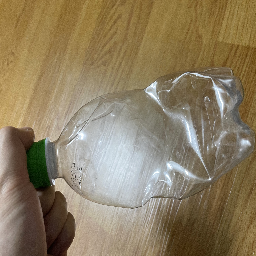

In [ ]:
PET_path = '/content/drive/MyDrive/테스트파일/가능/손/KakaoTalk_20211117_002027577_00.jpg'
img = keras.preprocessing.image.load_img(
    PET_path, target_size=(img_height, img_width)
)
img

In [ ]:
model.load_weights('/content/PET_model_V3.h5')
for p in range(5):
  PET_path = '//content/drive/MyDrive/테스트파일/가능/손/KakaoTalk_20211117_002027577_'+str(p).rjust(2,'0')+'.jpg'
  img = keras.preprocessing.image.load_img(
      PET_path, target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)

  a = ''
  if predictions[0] >= 0.3:
    a = ' X '
  else:
    a = ' O '
  if a == ' X ':
    ct += 1
    file_n.append(p)
for j in range(6):
  PET_path = '/content/drive/MyDrive/테스트파일/가능/손x/KakaoTalk_20211117_002027577_'+str(j).rjust(2,'0')+'.jpg'
  img = keras.preprocessing.image.load_img(
      PET_path, target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  a = ''
  if predictions[0] >= 0.3:
    a = ' X '
  else:
    a = ' O '
  if a == ' X ':
    ct0 += 1
    file_n0.append(j)
for i in range(18):
  PET_path = '/content/drive/MyDrive/테스트파일/불가능/KakaoTalk_20211117_002238726_'+str(i).rjust(2,'0')+'.jpg'
  img = keras.preprocessing.image.load_img(
      PET_path, target_size=(img_height, img_width)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  a = ''
  if predictions[0] >= 0.3:
    a = ' X '
  else:
    a = ' O '
  if a == ' O ':
    ct1 += 1
    file_n1.append(i)
ctsl.append(ct+ct0+ct1)

print(str(k)+'번째 체크포인트'+ '총 오류갯수 '+ str(ct+ct0+ct1))
print('가능 에러 수(손)'+ str(ct) + '  파일 번호는',file_n)
print('가능 에러 수'+ str(ct0) + '  파일 번호는',file_n0)

print('불가능 에러 수'+ str(ct1) + '  파일 번호는',file_n1 )

OSError: ignored